In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm
from sklearn import preprocessing
from sklearn import cluster, tree, decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, f1_score
from sklearn.metrics import classification_report, scorer, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB

In [2]:
%matplotlib inline

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
os.chdir('C:/Users/esnxwng/Desktop/UTA Pier 1/P1ProductData_UTA2019')

In [6]:
os.listdir()

['.RData',
 '.Rhistory',
 'initial_data.csv',
 'P1ProductData_UTA2019.csv',
 'Pier1_2019CompetitionQuestion.docx',
 'turnto-ugc.js',
 'UTA_Pier1.R',
 '~$er1_2019CompetitionQuestion.docx']

In [7]:
dataset = pd.read_csv('initial_data.csv')

In [8]:
dataset.columns

Index(['Unnamed: 0', 'SKU', 'ProductName', 'CountOfBigTransactions', 'ClassID',
       'Weight', 'Width', 'Depth', 'Height', 'LifeCycleName', 'FinishName',
       'Color', 'Season', 'Material', 'CountryOfOrigin', 'Quartile',
       'online-flag', 'Is_Season', 'BigTransactions', 'Size', 'Utility',
       'std_weight', 'std_height', 'std_width', 'std_depth', 'size_cluster',
       'size_std_cluster', 'man_cluster'],
      dtype='object')

In [9]:
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
dataset.head()

,SKU,ProductName,CountOfBigTransactions,ClassID,Weight,Width,Depth,Height,LifeCycleName,FinishName,Color,Season,Material,CountryOfOrigin,Quartile,online-flag,Is_Season,BigTransactions,Size,Utility,std_weight,std_height,std_width,std_depth,size_cluster,size_std_cluster,man_cluster
0,2790275,RPL HDW COLETTE LEGS,0,9801,1.10,3.35,3.35,11.93,FUT,None,Brown - Espresso,None,None,China,1,False,True,False,None,None,-0.345405,-0.264554,-0.810947,-0.463821,11,7,1
1,3191777,google express,0,7590,1.00,1.00,1.00,1.00,FUT,None,Blue,None,None,United States,1,False,True,False,None,None,-0.349469,-0.646752,-0.911939,-0.559483,11,7,11
2,2842220,X14 ORN JINGLE BELL SILVER $,0,1506,0.04,2.00,2.00,2.00,FUT,None,Silver,HOLIDAY,METAL,China,1,False,False,False,D300,ORNAMENTS,-0.388487,-0.611784,-0.868963,-0.518776,11,7,1
3,3888295,"REUSABLE BAGS, PROMO V.#2",0,9801,0.15,20.00,6.00,16.00,FUT,None,Multi-colored,None,None,Viet Nam,1,False,True,False,None,None,-0.384016,-0.122235,-0.095406,-0.355946,3,3,18
4,3186445,DISPLAY CRTN AURA MINERAL,0,9801,0.59,9.50,0.01,11.00,FUT,None,Gray - Dove,None,None,China,1,False,True,False,None,None,-0.366133,-0.297074,-0.546648,-0.599784,11,7,1


In [11]:
dataset.describe()

,SKU,CountOfBigTransactions,ClassID,Weight,Width,Depth,Height,Quartile,std_weight,std_height,std_width,std_depth,size_cluster,size_std_cluster,man_cluster
count,3.737700e+04,37377.000000,37377.000000,37377.000000,37377.000000,37377.000000,37377.000000,37377.000000,3.737700e+04,3.737700e+04,3.737700e+04,3.737700e+04,37377.000000,37377.000000,37377.000000
mean,3.310389e+06,208.356797,4422.340691,9.598293,22.220022,14.743996,19.495633,2.500147,-1.314732e-15,6.707141e-16,-3.019251e-16,-3.001778e-16,7.004334,7.235171,3.422131
std,3.538764e+05,837.621645,2421.648725,24.603877,23.269129,24.565512,28.597737,1.117726,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.829904,3.423746,4.367250
min,1.199880e+05,0.000000,1390.000000,0.010000,0.010000,0.000000,0.010000,1.000000,-3.897066e-01,-6.813697e-01,-9.544845e-01,-6.001908e-01,1.000000,1.000000,1.000000
25%,3.124731e+06,1.000000,2401.000000,0.620000,6.500000,2.750000,3.500000,2.000000,-3.649138e-01,-5.593321e-01,-6.755742e-01,-4.882453e-01,3.000000,4.000000,1.000000
50%,3.261870e+06,7.000000,3608.000000,1.760000,15.750000,6.000000,10.750000,3.000000,-3.185796e-01,-3.058156e-01,-2.780518e-01,-3.559460e-01,7.000000,7.000000,1.000000
75%,3.615704e+06,66.000000,6710.000000,7.000000,27.000000,16.500000,26.000000,3.000000,-1.056050e-01,2.274434e-01,2.054214e-01,7.148251e-02,11.000000,11.000000,3.000000
max,4.119855e+06,32598.000000,9803.000000,1650.000000,800.000000,720.000000,1200.000000,4.000000,6.667249e+01,4.127964e+01,3.342540e+01,2.870919e+01,13.000000,14.000000,18.000000


# Visualizing Size Cluster

## 1. Normal Variables

In [12]:
size_data = dataset[['Weight', 'Width', 'Depth', 'Height']]

In [13]:
pca = decomposition.PCA(3)

In [14]:
plot_columns = pca.fit_transform(size_data)

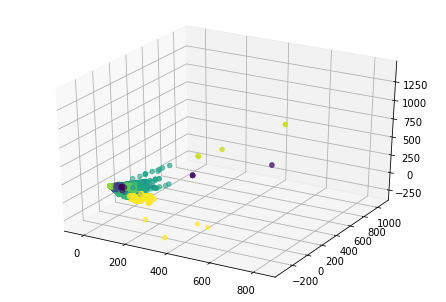

In [15]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs = plot_columns[:,0], ys = plot_columns[:,1], zs = plot_columns[:,2], zdir = 'z', c = dataset['size_cluster'])
plt.show()

## 2. Scaled Variables

In [16]:
scaled_size_data = dataset[['std_weight', 'std_width', 'std_depth', 'std_height']]

In [17]:
scaled_plot_columns = pca.fit_transform(scaled_size_data)

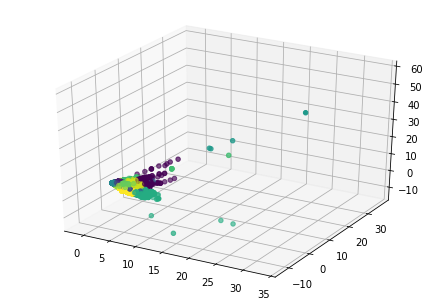

In [18]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(xs = scaled_plot_columns[:,0], ys = scaled_plot_columns[:,1], zs = scaled_plot_columns[:,2], zdir = 'z', c = dataset['size_std_cluster'])
plt.show()

# Reading in Prediction Results from Driveless H2O

In [47]:
os.chdir('C:/Users/esnxwng/Desktop/UTA Pier 1')

In [50]:
pred_results = pd.read_csv('FullRunPred.csv')

In [54]:
pred_results.drop(['Actual'], axis = 1, inplace = True)

In [55]:
pred_results['Predicted'] = pred_results.idxmax(axis=1)

In [57]:
cleaned_list = []

for i in pred_results['Predicted']:
    
    cleaned_list.append(i.split('.')[1])

In [59]:
pred_results['Predicted'] = cleaned_list

In [61]:
combined_dataset = pd.concat([dataset, pred_results], axis=1)

In [73]:
study_dataset = combined_dataset[(combined_dataset['Quartile'].astype(str) == combined_dataset['Predicted'])]

In [74]:
study_dataset.shape

(29953, 32)

In [75]:
combined_dataset.shape

(37377, 32)

In [80]:
study_dataset.drop(['Quartile.1', 'Quartile.2', 'Quartile.3', 'Quartile.4', 'Predicted'], axis=1, inplace=True)

C:\Users\esnxwng\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Naives Bayes Classifier

In [97]:
nb_data = study_dataset.copy()

In [98]:
nb_data.drop(['SKU', 'CountOfBigTransactions', 'ClassID', 'Weight', 'Width', 'Depth', 'Height', 'Utility', 'std_weight', 'std_height', 'std_width', 'std_depth', 'size_cluster'], axis=1, inplace=True)

In [99]:
nb_data.dtypes

ProductName         object
LifeCycleName       object
FinishName          object
Color               object
Season              object
Material            object
CountryOfOrigin     object
Quartile             int64
online-flag           bool
Is_Season             bool
BigTransactions       bool
Size                object
size_std_cluster     int64
man_cluster          int64
dtype: object

In [100]:
nb_data['Quartile'] = nb_data['Quartile'].astype(str)
nb_data['online-flag'] = nb_data['online-flag'].astype(str)
nb_data['Is_Season'] = nb_data['Is_Season'].astype(str)
nb_data['BigTransactions'] = nb_data['BigTransactions'].astype(str)
nb_data['size_std_cluster'] = nb_data['size_std_cluster'].astype(str)
nb_data['man_cluster'] = nb_data['man_cluster'].astype(str)

# Copying Data

In [19]:
light_gbm_data = dataset.copy()

In [20]:
light_gbm_data.drop(['SKU', 'ProductName', 'ClassID', 'Weight', 'Width', 'Depth', 'Height', 'size_cluster', 'BigTransactions'], axis = 1, inplace=True)

In [21]:
light_gbm_data.dtypes

CountOfBigTransactions      int64
LifeCycleName              object
FinishName                 object
Color                      object
Season                     object
Material                   object
CountryOfOrigin            object
Quartile                    int64
online-flag                  bool
Is_Season                    bool
Size                       object
Utility                    object
std_weight                float64
std_height                float64
std_width                 float64
std_depth                 float64
size_std_cluster            int64
man_cluster                 int64
dtype: object

In [22]:
light_gbm_data['size_std_cluster'] = light_gbm_data['size_std_cluster'].astype(str)
light_gbm_data['man_cluster'] = light_gbm_data['man_cluster'].astype(str)
light_gbm_data['online-flag'] = light_gbm_data['online-flag'].astype(str)
light_gbm_data['Is_Season'] = light_gbm_data['Is_Season'].astype(str)

# Trying out Light GBM

In [23]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score

In [24]:
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict

In [25]:
light_gbm_data, categorical_feats, encoder_dict = label_encoder(light_gbm_data)

In [26]:
light_gbm_data.head()

,CountOfBigTransactions,LifeCycleName,FinishName,Color,Season,Material,CountryOfOrigin,Quartile,online-flag,Is_Season,Size,Utility,std_weight,std_height,std_width,std_depth,size_std_cluster,man_cluster
0,0,1,6,11,7,44,3,1,0,1,5,572,-0.345405,-0.264554,-0.810947,-0.463821,11,0
1,0,1,6,4,7,44,28,1,0,1,5,572,-0.349469,-0.646752,-0.911939,-0.559483,11,2
2,0,1,6,45,4,31,3,1,0,0,4,363,-0.388487,-0.611784,-0.868963,-0.518776,11,0
3,0,1,6,34,7,44,29,1,0,1,5,572,-0.384016,-0.122235,-0.095406,-0.355946,7,9
4,0,1,6,28,7,44,3,1,0,1,5,572,-0.366133,-0.297074,-0.546648,-0.599784,11,0


In [27]:
light_gbm_data['Quartile'] = light_gbm_data['Quartile'] - 1

In [28]:
X = light_gbm_data.drop('Quartile', axis=1)
y = light_gbm_data.Quartile

# Train-Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=777)

# Light GBM

In [30]:
d_train = lgb.Dataset(X_train, label=y_train)

In [31]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['num_class'] = 4
params['metric'] = 'multi_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [32]:
clf = lgb.train(params, d_train, 100)

In [33]:
#Prediction
y_pred=clf.predict(X_test)

In [34]:
y_pred

array([[0.23164732, 0.2777249 , 0.24464609, 0.24598169],
       [0.26372592, 0.27751271, 0.23646619, 0.22229518],
       [0.22299439, 0.23429158, 0.25968486, 0.28302918],
       ...,
       [0.22813516, 0.22682106, 0.25791071, 0.28713307],
       [0.23122369, 0.22594519, 0.2285832 , 0.31424792],
       [0.23251948, 0.2260641 , 0.22669854, 0.31471788]])

In [36]:
y_pred_class = [np.argmax(line) for line in y_pred]

In [39]:
cm = confusion_matrix(y_test,y_pred_class)

[[2336  384   65    8]
 [ 736 1638  391   73]
 [ 168  719 1467  477]
 [   4   32  357 2359]]


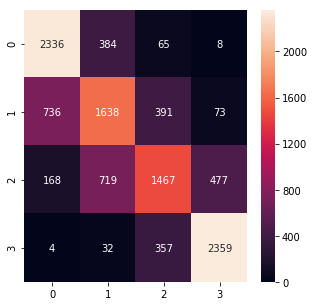

In [40]:
plt.figure(figsize = (5,5))

sns.heatmap(cm, annot=True, fmt="d")

In [44]:
accuracy=accuracy_score(y_pred_class,y_test)

In [45]:
accuracy

0.6955591225254146